# Machine Learning Exercise

Name:

RegNo:

In [2]:
# import necessary libraries
import pandas as pd
from pandas import read_csv
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the data: diabetes dataset provided in the repo
file_name = "diabetes.csv"
data = pd.read_csv(file_name)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# check the dimensions of the data, and explain why this step is important
data.shape

(768, 9)

#### Explanating why checking the dimensions of data is important
ITs because of the following reseons

1. `Data Integrity:` This ensures that the data is complete and accurate. 
    The shape of the data gives an idea of how much data is available for analysis. 
    It helps in detecting any inconsistencies or missing values in the data.

2. `Data Preprocessing:` The dimensions of data determine the appropriate preprocessing steps 
    to apply before building a machine learning model. Steps like data cleaning.

3. `Model Training:` Since machine learning models require a certain amount of data to learn 
    and generalize patterns in the data, checking the dimensions impacts this stage.
    If the dataset is too small, the model may not learn the underlying patterns in the data, 
    and if the dataset is too large, it may lead to overfitting. 
    
4. `Training time estimation:` The dimensions of data have a significant impact 
    on the training times of machine learning models. 
    As the size of the dataset increases, the training time of machine learning models also increases.

In [ ]:
#transform the dataset by filling in values that are min = 0 but are not accurate e.g Insulin min=0
#chose the best way you think to replace those values, whether with the mean value e.t.c

### Data Transformation

In [7]:
# create a copy of the original dataset with a new name
cleaned_data = data.copy()

# replace the 0 values with the mean of non-zero values in the Glucose column
mean_g = cleaned_data[cleaned_data["Glucose"] != 0]["Glucose"].mean()
cleaned_data["Glucose"] = cleaned_data["Glucose"].replace(0, mean_g)

# replace the 0 values with the mean of non-zero values in the BloodPressure column
mean_bp = cleaned_data[cleaned_data["BloodPressure"] != 0]["BloodPressure"].mean()
cleaned_data["BloodPressure"] = cleaned_data["BloodPressure"].replace(0, mean_bp)

# replace the 0 values with the mean of non-zero values in the Insulin column
mean_i = cleaned_data[cleaned_data["Insulin"] != 0]["Insulin"].mean()
cleaned_data["Insulin"] = cleaned_data["Insulin"].replace(0, mean_i)

# replace the 0 values with the mean of non-zero values in the BMI column
mean_bmi = cleaned_data[cleaned_data["BMI"] != 0]["BMI"].mean()
cleaned_data["BMI"] = cleaned_data["BMI"].replace(0, mean_bmi)

# replace the 0 values with the mean of non-zero values in the SkinThickness column
mean_st = cleaned_data[cleaned_data["SkinThickness"] != 0]["SkinThickness"].mean()
cleaned_data["SkinThickness"] = cleaned_data["SkinThickness"].replace(0, mean_st)

# clean the data by removing any duplicates and handling missing values
cleaned_data.drop_duplicates(inplace=True)
cleaned_data.dropna(inplace=True)

# printing the first 5 rows
cleaned_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [8]:
# create a copy of the original dataset with a new name
transformed_data = data.copy()
# Drop duplicates and fill NaN values with zero
transformed_data.drop_duplicates(transformed_data)
transformed_data = transformed_data.fillna(0)
transformed_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#install missingno
%pip install missingno

<Axes: >

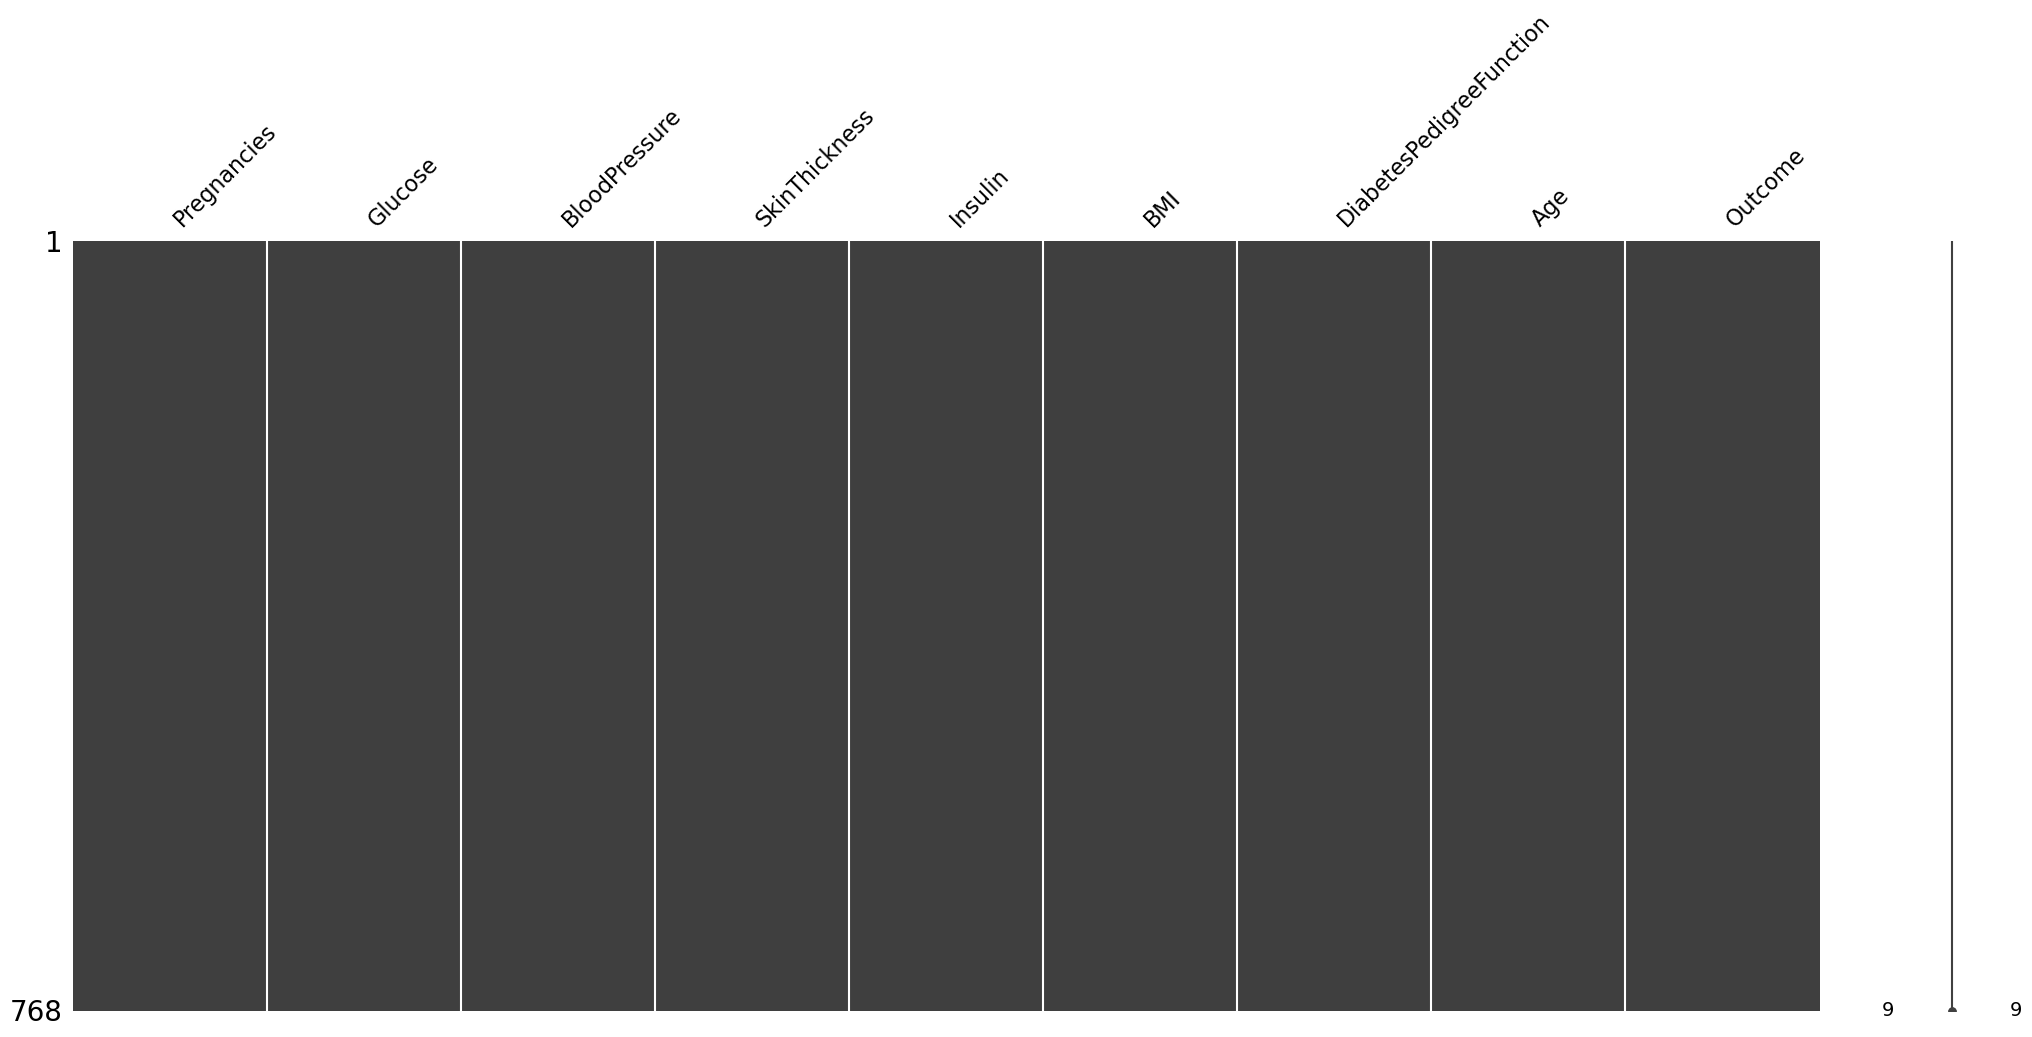

In [9]:
# plot the missingness matrix with missingno
import missingno as msno
# ploting missingness matrix with missingno
msno.matrix(transformed_data)

In [ ]:
#install pandas profiling
%pip install ydata-profiling

In [10]:
# export an html report for your profiling

from ydata_profiling import profile_report
# create an EDA report using pandas profiling
profile = transformed_data.profile_report()
profile.to_file(output_file="eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#install seaborn and plot at least 2-3 variables of your choice

#after plotting explain what the plot is communicating.

In [ ]:
# Install Seaborb
%pip install seaborn

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

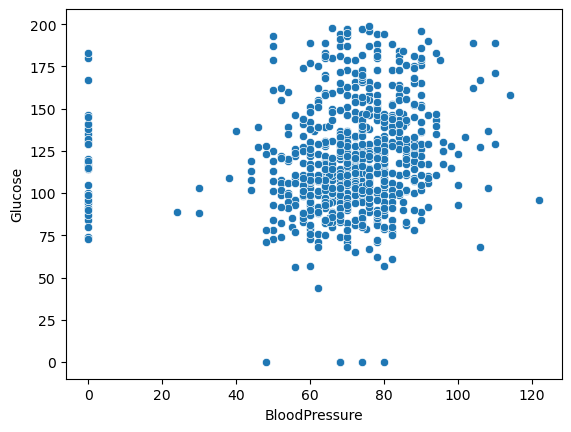

In [12]:
# Import Seaborn
import seaborn as sns
# import matplotlib.pyplot as plt
sns.scatterplot(transformed_data, x="BloodPressure", y="Glucose")

# plt.title("Scatter Plot of Weight versus Age")
# plt.xlabel("Age")
# plt.ylabel("Weight")
# plt.show()

# sns.histplot(
#     data=transformed_data, x="days_art", hue="sex", multiple="dodge")

#Further exercises

Model spot checking,
- I would like for you to choose up to 20 diferent models for classification in the sklearn library and add them in the code below
- The idea is to evaluate as many as possible, you can add even more of those.
- run them through the code below and then find the ones that might work well with your data.

In [13]:
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    VotingClassifier,
)
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import (
    make_scorer,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
)

dataframe = transformed_data

# Split the dataset
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Prepare models
models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("CART", DecisionTreeClassifier()),
    ("NB", GaussianNB()),
    ("SVM", SVC(probability=True)),  # Enable probability for SVC to calculate MCC
    ("RF", RandomForestClassifier()),
    ("GB", GradientBoostingClassifier()),
    ("ADA", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier()),
    ("ExtraTrees", ExtraTreesClassifier()),
    ("MLP", MLPClassifier(max_iter=1000)),
    ("GaussianProcess", GaussianProcessClassifier(1.0 * RBF(1.0))),
    (
        "Voting",
        VotingClassifier(
            estimators=[
                ("lr", LogisticRegression(max_iter=1000)),
                ("rf", RandomForestClassifier()),
                ("gnb", GaussianNB()),
            ]
        ),
    ),
    (
        "Stacking",
        StackingClassifier(
            estimators=[("rf", RandomForestClassifier()), ("gnb", GaussianNB())],
            final_estimator=LogisticRegression(),
        ),
    ),
    ("GBC", GradientBoostingClassifier()),
    ("SVM_poly", SVC(kernel="poly", probability=True)),
    ("SVM_rbf", SVC(kernel="rbf", probability=True)),
    ("SVM_sigmoid", SVC(kernel="sigmoid", probability=True)),
    ("SVM_linear", SVC(kernel="linear", probability=True)),
]


# Scoring metrics
scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score),
    "MCC": make_scorer(matthews_corrcoef),
}


# Evaluate models function
def evaluate_models(models, X, Y, scoring, n_splits=10, random_seed=7):
    scores = []
    for name, model in models:
        kfold = KFold(n_splits=n_splits, random_state=random_seed, shuffle=True)
        cv_results = cross_validate(model, X, Y, cv=kfold, scoring=scoring)
        scores.append(
            {
                "Model": name,
                "F1 Score": np.mean(cv_results["test_f1"]),
                "Recall": np.mean(cv_results["test_recall"]),
                "Precision": np.mean(cv_results["test_precision"]),
                "MCC": np.mean(cv_results["test_MCC"]),
            }
        )
    return pd.DataFrame(scores)

# Evaluation
model_scores = evaluate_models(models, X, Y, scoring)

# Display the consolidated scores
print(model_scores)

              Model  F1 Score    Recall  Precision       MCC
0                LR  0.628733  0.565837   0.713245  0.475102
1               LDA  0.620423  0.555180   0.708347  0.463732
2               KNN  0.539798  0.497379   0.601724  0.335675
3              CART  0.550199  0.542414   0.565527  0.323944
4                NB  0.629839  0.599243   0.669300  0.454409
5               SVM  0.576544  0.478453   0.739531  0.444037
6                RF  0.622405  0.575925   0.689666  0.458764
7                GB  0.630123  0.596746   0.674509  0.455623
8               ADA  0.655594  0.630930   0.692205  0.489505
9           Bagging  0.593522  0.542697   0.663142  0.417948
10       ExtraTrees  0.622103  0.569060   0.691354  0.456268
11              MLP  0.508475  0.509694   0.578346  0.306421
12  GaussianProcess  0.449805  0.396991   0.687357  0.336225
13           Voting  0.643117  0.592487   0.710427  0.489883
14         Stacking  0.627550  0.580847   0.691915  0.466654
15              GBC  0.6

In [ ]:
#chose your best model and train the model based on the example in the code
#For this cell let the parameters in your first model be on default

In [36]:
# Calculate average score for each model
model_scores["Average_Score"] = model_scores[
    ["F1 Score", "Recall", "Precision", "MCC"]
].mean(axis=1)

# Sort models by average score (descending order)
ranked_models = model_scores.sort_values(by="Average_Score", ascending=False)

# Display the ranked models
print(ranked_models[["Model", "Average_Score"]])

              Model  Average_Score
8               ADA       0.617059
13           Voting       0.606844
0                LR       0.595729
14         Stacking       0.595204
6                RF       0.591909
19       SVM_linear       0.590436
15              GBC       0.589250
4                NB       0.588198
7                GB       0.587695
1               LDA       0.586921
10       ExtraTrees       0.570915
16         SVM_poly       0.559667
5               SVM       0.559641
17          SVM_rbf       0.559641
9           Bagging       0.530412
11              MLP       0.522589
2               KNN       0.493644
12  GaussianProcess       0.467594
3              CART       0.467320
18      SVM_sigmoid       0.043192


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the AdaBoost Classifier with default parameters
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7337662337662337


In [ ]:
#update the parameters as you see fit and record your results
#you can run as many examples as possible.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the results dictionary to record the accuracy for each configuration
results = {}

# Define parameter configurations to try
parameters = [
    {
        "n_estimators": 50,
        "learning_rate": 0.1,
        "random_state": 42,
    },  # Default parameters
    {
        "n_estimators": 100,
        "learning_rate": 0.5,
        "random_state": 42,
    },  # Increased n_estimators and learning_rate
    {
        "n_estimators": 200,
        "learning_rate": 0.1,
        "random_state": 42,
    },  # Increased n_estimators
    {
        "n_estimators": 50,
        "learning_rate": 1.0,
        "random_state": 42,
    },  # Increased learning_rate
]

# Train and evaluate the model for each parameter configuration
for i, param_config in enumerate(parameters):
    # Initialize the AdaBoost Classifier model with current parameters
    model = AdaBoostClassifier(**param_config)

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    # Record the accuracy for the current configuration
    results[f"Configuration {i+1}"] = accuracy

# Display the recorded results
for config, accuracy in results.items():
    print(f"{config}: Accuracy - {accuracy}")

Configuration 1: Accuracy - 0.7662337662337663
Configuration 2: Accuracy - 0.7532467532467533
Configuration 3: Accuracy - 0.7662337662337663
Configuration 4: Accuracy - 0.7337662337662337


In [ ]:
#Try another model of your choice and repeate the same steps as above.

In [37]:
# KNN with Dafault
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the K-Nearest Neighbors (KNN) classifier with default parameters
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6623376623376623


In [39]:
# KNN with adjustments
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the K-Nearest Neighbors (KNN) classifier with adjusted parameters
model = KNeighborsClassifier(
    n_neighbors=10, weights="distance", algorithm="auto", metric="manhattan"
)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7077922077922078


Report:
- Write your discoveries in detail and what you have learnt below.
- Be as detailed as possible, this is very important.

In [5]:
#apply two transformations to the data

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Apply Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

# Split the scaled dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

# Initialize the K-Nearest Neighbors (KNN) classifier with adjusted parameters
model = KNeighborsClassifier(n_neighbors=10)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7142857142857143


In [6]:
#run model spot checkking again

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the AdaBoostClassifier with default parameters
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X, Y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", cv_scores.mean())

Accuracy: 0.7337662337662337
Cross-validation Accuracy: 0.7631270690094218


In [7]:
#which model was the best?

In [43]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
filename = "diabetes.csv"
dataframe = pd.read_csv(filename)

# Split the dataset into features (X) and target variable (Y)
X = dataframe.iloc[:, 0:8]
Y = dataframe.iloc[:, 8]

# Define models
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
]

# Define evaluation metrics
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
}

# Evaluate models using cross-validation
results = []
for name, model in models:
    cv_results = cross_validate(model, X, Y, cv=5, scoring=scoring)
    avg_results = {metric: cv_results[f"test_{metric}"].mean() for metric in scoring}
    results.append((name, avg_results))

# Display results
for name, result in results:
    print(f"Model: {name}")
    for metric, value in result.items():
        print(f"{metric.capitalize()}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.7721925133689839
Precision: 0.7196000559468052
Recall: 0.5747030048916841
F1: 0.6374328442978329

Model: K-Nearest Neighbors
Accuracy: 0.723979288685171
Precision: 0.6224949494949495
Recall: 0.5302585604472397
F1: 0.5704872499161476

Model: AdaBoost Classifier
Accuracy: 0.7631270690094218
Precision: 0.6942089193753586
Recall: 0.5934311670160727
F1: 0.6371160348510471



Report:
- Write your discoveries in detail and what you have learnt below.
- Be as detailed as possible, this is very important.